In [5]:
import os 

In [9]:
import pandas as pd
train_df = pd.read_csv("train.csv",index_col = 'PassengerId')
test_df = pd.read_csv("test.csv",index_col = 'PassengerId')
df = pd.concat((train_df,test_df),axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


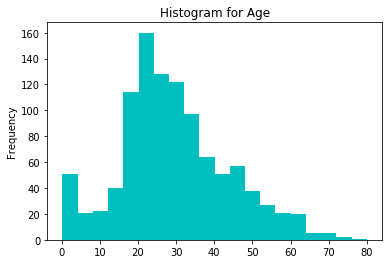

In [13]:
#Distribution

#histograms with bin
import matplotlib
df.Age.plot(kind = 'hist',title = 'Histogram for Age',color='c',bins=20)

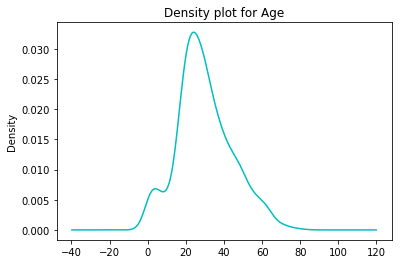

In [21]:
#we can use KDE plot for density 
df.Age.plot(kind= 'kde',title = 'Density plot for Age',color = 'c')

In [19]:
#calculate skewness
print("Skewness for age: {0:.2f}".format(df.Age.skew()))
print("Skewness for Fare: {0:.2f}".format(df.Fare.skew()))

Skewness for age: 0.41
Skewness for Fare: 4.37


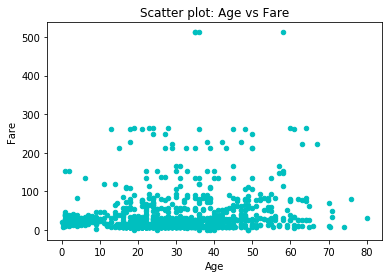

In [20]:
#use scatter plot for bi-variate distribution
df.plot.scatter(x='Age',y='Fare',color = 'c',title = 'Scatter plot: Age vs Fare');

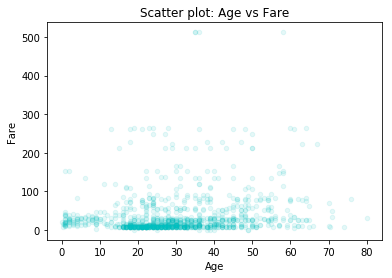

In [22]:
#we can use alpha to have transparency in the plot
df.plot.scatter(x= 'Age', y= 'Fare',color = 'c',title= 'Scatter plot: Age vs Fare',alpha = 0.1)

In [30]:
#Grouping and Aggregate
#Find mean of Age group by Sex
df.groupby('Sex')['Age'].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [31]:
df.groupby('Pclass')['Age','Fare'].mean()

,Age,Fare
Pclass,,
1,39.159930,87.508992
2,29.506705,21.179196
3,24.816367,13.302889


In [32]:
#can be used to get different aggregate on different column
df.groupby('Pclass').agg({'Fare':'mean','Age':'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [34]:
df.groupby(['Pclass','Sex']).Fare.mean()

Pclass  Sex   
1       female    109.412385
        male       69.888385
2       female     23.234827
        male       19.904946
3       female     15.324250
        male       12.415462
Name: Fare, dtype: float64

In [35]:
#Crosstab-two dimensional table
pd.crosstab(df.Pclass,df.Sex)


Sex,female,male
Pclass,,
1,144,179
2,106,171
3,216,493


In [36]:
#Pivot
df.pivot_table(index='Sex',columns = 'Pclass',values = 'Age',aggfunc = 'mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [37]:
#pivot is similar to groupby but pivot is in tabular form
df.groupby(['Sex','Pclass']).Age.mean().unstack()#adding unstack() in group by gives result in tabular form

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64